In [2]:
import os
import shutil


for dirname, _, filenames in os.walk('/kaggle/working/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import shutil

In [6]:
path="/kaggle/working/"
# print(path)
# file_path=car
# print(file_path)

/kaggle/working/
/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1).jpeg


In [5]:
dataDir="/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/"
# dataDir
car=dataDir+"Car/Car (1).jpeg"
# car

'/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1).jpeg'

In [10]:
shutil.os.mkdir(path + "train")
shutil.os.mkdir(path + "evaluation")
shutil.os.mkdir(path + "test")

In [11]:
shutil.os.mkdir(path + "train/Bike")
shutil.os.mkdir(path + "train/Car")
shutil.os.mkdir(path + "evaluation/Bike")
shutil.os.mkdir(path + "evaluation/Car")
shutil.os.mkdir(path + "test/Car")
shutil.os.mkdir(path + "test/Bike")

In [19]:
# os.remove(path+"train")

In [13]:
# i=4
# f"{dataDir}Car/Car ({i+1}).jpeg"

'/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (5).jpeg'

In [13]:
for i in range(1,700):
    if(os.path.exists(f"{dataDir}Car/Car ({i}).jpeg")):
        shutil.copyfile(f"{dataDir}Car/Car ({i}).jpeg",path+f"train/Car/Car ({i}).jpeg")
        
        

for i in range(1,700):
    if(os.path.exists(f"{dataDir}Bike/Bike ({i}).jpeg")):
        shutil.copyfile(f"{dataDir}Bike/Bike ({i}).jpeg",path+f"train/Bike/Bike ({i}).jpeg")

In [16]:

for i in range(701,1000):
    if(os.path.exists(f"{dataDir}Bike/Bike ({i}).jpeg")):
        shutil.copyfile(f"{dataDir}Bike/Bike ({i}).jpeg",path+f"evaluation/Bike/Bike ({i}).jpeg")
        
for i in range(701,1000):
    if(os.path.exists(f"{dataDir}Car/Car ({i}).jpeg")):
        shutil.copyfile(f"{dataDir}Car/Car ({i}).jpeg",path+f"evaluation/Car/Car ({i}).jpeg")

In [17]:

for i in range(1001,1300):
    if(os.path.exists(f"{dataDir}Bike/Bike ({i}).jpeg")):
        shutil.copyfile(f"{dataDir}Bike/Bike ({i}).jpeg",path+f"test/Bike/Bike ({i}).jpeg")
        
for i in range(1001,1300):
    if(os.path.exists(f"{dataDir}Car/Car ({i}).jpeg")):
        shutil.copyfile(f"{dataDir}Car/Car ({i}).jpeg",path+f"test/Car/Car ({i}).jpeg")

In [34]:
# for i in range(7,10):
#     shutil.move(f'/kaggle/working/train/Car ({i}).jpeg',f'/kaggle/working/train/Car/Car ({i}).jpeg')

(100, 100)


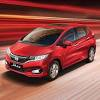

In [28]:
from PIL import Image
image = Image.open(car)
print(image.size)
image


# Import

In [25]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Data preprocessing

In [20]:
class DataPreprocessor:
    def __init__(self, data_dir, batch_size, image_size):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.image_size = image_size

    def create_data_loaders(self):
        data_transforms = {
            'train': transforms.Compose([
                transforms.Resize((self.image_size, self.image_size)),  # Resize images to a consistent size
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225]
                                     )
            ]),
            'val': transforms.Compose([
                transforms.Resize((self.image_size, self.image_size)),  # Resize images to a consistent size
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]),
            'test': transforms.Compose([
                transforms.Resize((self.image_size, self.image_size)),  # Resize images to a consistent size
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        }

        image_datasets = {
            'train': ImageFolder(os.path.join(self.data_dir, 'train'), data_transforms['train']),
            'val': ImageFolder(os.path.join(self.data_dir, 'evaluation'), data_transforms['val']),
            'test': ImageFolder(os.path.join(self.data_dir, 'test'), data_transforms['test'])
        }

        data_loaders = {
            'train': DataLoader(image_datasets['train'], batch_size=self.batch_size, shuffle=True),
            'val': DataLoader(image_datasets['val'], batch_size=self.batch_size, shuffle=False),
            'test': DataLoader(image_datasets['test'], batch_size=self.batch_size, shuffle=False)
        }
        return data_loaders

# Model

In [ ]:
import torchvision.models as models
# model = models.resnet18(pretrained=True)
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model

In [12]:
import torch.nn as nn
import torchvision.models as models

class CarBikeClassifier(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(CarBikeClassifier, self).__init__()
        self.model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Train

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim


def train_model(data_loaders, num_epochs, device):
    model = CarBikeClassifier(num_classes=2).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0
            for inputs, labels in data_loaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(data_loaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(data_loaders[phase].dataset)
            print(f'Epoch {epoch + 1}/{num_epochs}, {phase} Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')
    return model

# Evaluation

In [34]:
import torch

def evaluate_model(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')


In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Main function

In [36]:
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_dir = '/kaggle/working'
    batch_size = 32
    image_size = 224
    num_epochs = 5
    data_processor = DataPreprocessor(data_dir, batch_size, image_size)
    data_loaders = data_processor.create_data_loaders()

    print("----------Training Start----------------")
    model = train_model(data_loaders, num_epochs, device)
    print("----------Training Completed----------------")
    evaluate_model(model, data_loaders['test'], device)
    torch.save(model.state_dict(), 'model.pth')
if __name__ == "__main__":
    main()

----------Training Start----------------
Epoch 1/5, train Loss: 0.1198, Acc: 0.9647
Epoch 1/5, val Loss: 0.3728, Acc: 0.9348
Epoch 2/5, train Loss: 0.1081, Acc: 0.9676
Epoch 2/5, val Loss: 0.0891, Acc: 0.9749
Epoch 3/5, train Loss: 0.0786, Acc: 0.9697
Epoch 3/5, val Loss: 0.8804, Acc: 0.7943
Epoch 4/5, train Loss: 0.0327, Acc: 0.9899
Epoch 4/5, val Loss: 0.0524, Acc: 0.9766
Epoch 5/5, train Loss: 0.0516, Acc: 0.9841
Epoch 5/5, val Loss: 0.0542, Acc: 0.9833
----------Training Completed----------------
Accuracy on the test set: 97.99%


# Inference

In [37]:
import matplotlib.pyplot as plt

def predict_image(model, image_path, device):
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output.data, 1)
    class_names = ['bike', 'car']
    prediction = class_names[predicted.item()]
    # displaying the title
    plt.title(prediction,
              fontsize='20',
              backgroundcolor='red',
              color='white')
    plt.imshow(image)
    # return prediction


In [38]:
model = CarBikeClassifier(num_classes=2)
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

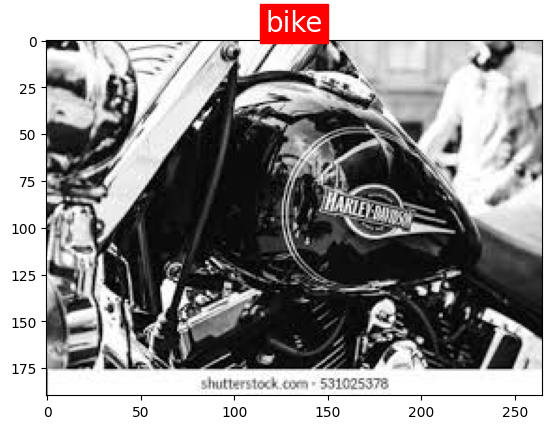

In [40]:

image_file = '/kaggle/working/test/Bike/Bike (1100).jpeg'
predict_image(model, image_file, device='cpu')